# **EDA - leíró statisztikák**
Fogarassyné Vathy Ágnes

Mielőtt elkezdenénk a munkát, olvassuk be a szükséges adathalmazokat. A *reserachpy* wrapper valószínűleg nincs installálva még, ezért első lépésben telepítsük (ha szükséges). Ha nem tudjuk, hogy telepítve van-e a csomag, akkor előtte ellenőrizzük!

A telepített csomagok listázása:

In [1]:
!pip list

Package                   Version
------------------------- -----------
alembic                   1.16.5
appnope                   0.1.4
asttokens                 3.0.0
attrs                     25.3.0
colorlog                  6.9.0
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.16
decorator                 5.2.1
et_xmlfile                2.0.0
executing                 2.2.1
fastjsonschema            2.21.2
fonttools                 4.59.2
graphviz                  0.21
ipykernel                 6.30.1
ipython                   9.5.0
ipython_pygments_lexers   1.1.1
jedi                      0.19.2
Jinja2                    3.1.6
joblib                    1.5.2
jsonschema                4.25.1
jsonschema-specifications 2025.4.1
jupyter_client            8.6.3
jupyter_core              5.8.1
kiwisolver                1.4.9
lightgbm                  4.6.0
Mako                      1.3.10
MarkupSafe          

A *reserarchpy* telepítése, ha szükséges:

In [2]:
!pip install researchpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 10.8 MB/s  0:00:00 11.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [researchpy] 1/3 [statsmodels]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## **1. Adatok beolvasása**

A leíró statisztikai lehetőségek áttekintéséhez válasszunk a DataScience világában talán a legismertebb adathalmazt.   
Az **iris** adathalmaz 150 iris virág adatát tartalmazza (csésze- és sziromlevél hossza és szélessége, valamit az iris virág alfaja).

Szükséges csomagok importja:

In [3]:
import pandas as pd
import numpy as np
import researchpy as rp #Statisztikai függvények
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import scipy.stats as stats

**Blokk 1.1** Első lépésben olvassuk be az adathalmazt!

In [4]:
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=['slength', 'swidth', 'plength', 'pwidth'])
iris['iclass'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

iris

,slength,swidth,plength,pwidth,iclass
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
iris.head(5)

,slength,swidth,plength,pwidth,iclass
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Blokk 1.2** A DataFrame oszlopai:

In [6]:
iris.columns

Index(['slength', 'swidth', 'plength', 'pwidth', 'iclass'], dtype='object')

**Blokk 1.3** Amennyiben az attribútumok típusára is kíváncsiak vagyunk, akkor az DataFrame-en meghívott **dtypes** ad számunkra információt:

In [7]:
iris.dtypes

slength     float64
swidth      float64
plength     float64
pwidth      float64
iclass     category
dtype: object

**Blokk 1.4** Még több információt kaphatunk, ha a DataFrame-en az **info** függvényt hívjuk meg:

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   slength  150 non-null    float64 
 1   swidth   150 non-null    float64 
 2   plength  150 non-null    float64 
 3   pwidth   150 non-null    float64 
 4   iclass   150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## **2. Leíró statisztikák a Pandas csomagban**

### Alapvető leíró statisztikák

**Blokk 2.1** A numerikus adatok alapvető leíró statisztikáját Pythonban nagyon könnyen elkészíthetjük a **describe** függvény meghívásával:

In [9]:
iris.describe()

,slength,swidth,plength,pwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Blokk 2.2** Természetesen léteznek külön függvények is, melyek ugyanezeket a funkciókat valósítják meg. Ezen függvények: **count**, **min**, **max**, **mean**, **std**, **quantile**.

In [10]:
iris.slength.count()

np.int64(150)

In [11]:
iris.slength.min()

np.float64(4.3)

In [12]:
iris.slength.max()

np.float64(7.9)

In [13]:
iris.slength.mean()

np.float64(5.843333333333334)

**Blokk 2.3** Szórás számítása:

In [14]:
iris.slength.std()

np.float64(0.828066127977863)

**Blokk 2.4** Egy-egy adatsorra könnyedén kiszámíthatjuk az adathalmaz szórásnégyzetét is a **var** függvény segítségével:

In [15]:
iris.slength.var()

np.float64(0.6856935123042507)

**Blokk 2.5** A D1-es decilis számítása a *csészelevél hosszán*:

In [16]:
iris.slength.quantile(0.1)

np.float64(4.8)

**Blokk 2.6** A Q1, Q2, Q3 kvartilisek számítása a *csészelevél hosszán*:

In [17]:
iris.slength.quantile([0.25, 0.5, 0.75])

0.25    5.1
0.50    5.8
0.75    6.4
Name: slength, dtype: float64

**Blokk 2.7** Kategorikus adatok esetében a **unique** függvény segítségével könnyedén lekérdezhetjük, hogy milyen értékeket vesz fel az attribútum:

In [18]:
iris.iclass.unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

**Blokk 2.8** A **value_counts()** függvény segítségével megszámolható az előforduló értékek gyakorisága.

Hány érték fordul elő az egyes kategóriákban?

In [19]:
iris.iclass.value_counts()

iclass
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Bár azt most nem láthattuk, de az eredmény a gyakorsiág szerint csökkenő rendezettségű. Ha szeretnénk, hogy a legkevésbé gyakori érték legyen elől, akkor a value_counts() fv-nem paraméterként ezt meg kell adni: **value_counts(ascending=True)**

**Blokk 2.9** Tetszőleges attribútum módusza a **mode** függvénnyel kérdezhető le:

In [20]:
iris.iclass.mode()

0        setosa
1    versicolor
2     virginica
Name: iclass, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [21]:
iris.slength.mode()

0    5.0
Name: slength, dtype: float64

## **3. Alcsoportok statisztikai jellemzése**

A DataFrame rekordjait csoportosíthatjuk a **groupby** metódussal, majd a létrejött csoportokon is futtathatunk leíró statisztikákat.

**Blokk 3.1** Csoportosítsuk az adatokat az alfajok alapján, majd vizsgáljuk meg, hogy az egyes osztályokba hány virág tartozik!

In [22]:
iris.groupby('iclass')['iclass'].count()

/var/folders/p9/yfdwydy169s3mz1hd23bwrtw0000gn/T/ipykernel_46638/936625530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris.groupby('iclass')['iclass'].count()


iclass
setosa        50
versicolor    50
virginica     50
Name: iclass, dtype: int64

**Blokk 3.2** Nézzük meg, hogy a csészelevél átlagos hosszúsága milyen az egyes alfajokban:

In [23]:
iris.groupby('iclass')['pwidth'].mean()

/var/folders/p9/yfdwydy169s3mz1hd23bwrtw0000gn/T/ipykernel_46638/2713752129.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  iris.groupby('iclass')['pwidth'].mean()


iclass
setosa        0.246
versicolor    1.326
virginica     2.026
Name: pwidth, dtype: float64

## **4. Leíró statisztikák a researchpy-ban**

**Blokk 4.1** A folytonos értékű változók statisztikai jellemzése a *summary_cont* függvény segítségével történik.

In [24]:
rp.summary_cont(iris['swidth'])

/Users/tothi/pysrc/pemik/fgt/.venv/lib/python3.13/site-packages/researchpy/summary.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'swidth' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = group1.name


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,swidth,150.0,3.0573,0.4359,0.0356,2.987,3.1277


**Blokk 4.2** Kategorikus értékű változók esetében a *summary_cat* függvény adja vissza a statisztikai adatokat.

In [25]:
rp.summary_cat(iris['iclass'])

,Variable,Outcome,Count,Percent
0,iclass,setosa,50,33.33
1,,versicolor,50,33.33
2,,virginica,50,33.33


**Blokk 4.3** A *codebook* függvény segítségével pedig komplex leírást kaphatunk a teljes DataFrame-ről, vagy Series-ről.

In [26]:
rp.codebook(iris)

Variable: slength    Data Type: float64 

 Number of Obs.: 150 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 35 

 Range: [4.3, 7.9] 
 Mean: 5.84 
 Standard Deviation: 0.83 
 Mode: 5.0 
 10th Percentile: 4.8 
 25th Percentile: 5.1 
 50th Percentile: 5.8 
 75th Percentile: 6.4 
 90th Percentile: 6.9 





Variable: swidth    Data Type: float64 

 Number of Obs.: 150 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 23 

 Range: [2.0, 4.4] 
 Mean: 3.06 
 Standard Deviation: 0.44 
 Mode: 3.0 
 10th Percentile: 2.5 
 25th Percentile: 2.8 
 50th Percentile: 3.0 
 75th Percentile: 3.3 
 90th Percentile: 3.6099999999999994 





Variable: plength    Data Type: float64 

 Number of Obs.: 150 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 43 

 Range: [1.0, 6.9] 
 Mean: 3.76 
 Standard Deviation: 1.77 
 Mode: 1.4 
 10th Percentile: 1.4 
 25th Percentile: 1.6 
 50th Percentile: 4.35 
 75th Percentile: 5.1 

## **5. Eloszlások**

**Blokk 5.1** Normalitás ellenőrzése QQ plottal:

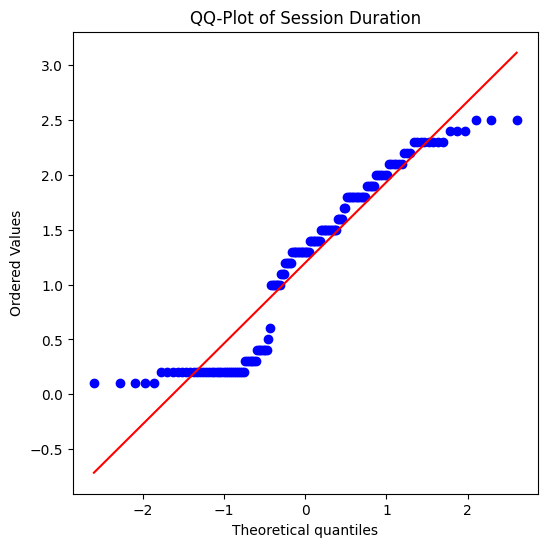

In [27]:
# QQ-Plot készítése
plt.figure(figsize=(6,6))
stats.probplot(iris['pwidth'], dist="norm", plot=plt)
plt.title("QQ-Plot of Session Duration")
plt.show()

> Látható az erőteljes eltérés az egyenestől, így valószínűleg nem normális eloszlású az adatsor.

**Blokk 5.2** Normalitás ellenőrzése Kolgomorov-Smirnov teszttel:

In [28]:
from scipy.stats import kstest

stat, p = kstest(iris['pwidth'], 'norm', args=(np.mean(iris['pwidth']), np.std(iris['pwidth'])))
print(f"Kolmogorov-Smirnov p-érték: {p}")

if p > 0.05:
    print("A sziromlevél szélessége valószínűleg normál eloszlású.")
else:
    print("A sziromlevél szélessége valószínűleg nem normál eloszlású.")

Kolmogorov-Smirnov p-érték: 0.00020003757835057755
A sziromlevél szélessége valószínűleg nem normál eloszlású.


**Blokk 5.3** Mivel kicsi a mintaszám, érdemes a Shapiro_Wilk tessztel megnézni:

In [29]:
from scipy.stats import shapiro

stat, p = shapiro(iris['pwidth'])
print(f"Shapiro-Wilk p-érték: {p}")

if p > 0.05:
    print("A sziromlevél szélessége valószínűleg normál eloszlású (elfogadjuk a nullhipotézist).")
else:
    print("A sziromlevél szélessége valószínűleg nem normál eloszlású (elutasítjuk a nullhipotézist).")

Shapiro-Wilk p-érték: 1.6804652103149898e-08
A sziromlevél szélessége valószínűleg nem normál eloszlású (elutasítjuk a nullhipotézist).
